<a href="https://colab.research.google.com/github/Chanda92/CE888/blob/master/Assignment/Covariate%20Shift/Housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from pandas import Series, DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Import libraries**


In [2]:
import os

os.environ['KAGGLE_USERNAME'] = "chandabakshi" # username from the json file

os.environ['KAGGLE_KEY'] = "36f7c6b2609f47f03c062336ff339ea2" # key from the json file

!kaggle competitions download -c house-prices-advanced-regression-techniques # api copied from kaggle

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 25.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.0MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 32.1MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.8MB/s]


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.dtypes,test.dtypes

(Id                 int64
 MSSubClass         int64
 MSZoning          object
 LotFrontage      float64
 LotArea            int64
                   ...   
 MoSold             int64
 YrSold             int64
 SaleType          object
 SaleCondition     object
 SalePrice          int64
 Length: 81, dtype: object, Id                 int64
 MSSubClass         int64
 MSZoning          object
 LotFrontage      float64
 LotArea            int64
                   ...   
 MiscVal            int64
 MoSold             int64
 YrSold             int64
 SaleType          object
 SaleCondition     object
 Length: 80, dtype: object)

In [7]:
# Handling missing data

for i in train.columns:
    if(train[i].dtype == 'object'):
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if((train[i].dtype == 'int') or (train[i].dtype == 'float')):
      train[i] = train[i].fillna(np.mean(train[i]))

for i in test.columns:
    if(test[i].dtype == 'object'):
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if((test[i].dtype == 'int') or (test[i].dtype == 'float')):
      test[i] = test[i].fillna(np.mean(test[i]))

print('Nulls in train set:', train.isnull().sum().sum())
print('Nulls in test set:', test.isnull().sum().sum())

Nulls in train set: 0
Nulls in test set: 0


In [8]:
# Label encoding


print('Label Encoding categorical variables...')
num = LabelEncoder()
for i in train.columns:
    if(train[i].dtype == 'object'):
      train[i] = num.fit_transform(train[i].astype('str'))
      #train_data[i] = train_data[i].astype('object')
print(train)
for i in test.columns:
    if(test[i].dtype == 'object'):
     test[i] = num.fit_transform(test[i].astype('str'))
     #test[i] = test[i].astype('object')
print(test)

Label Encoding categorical variables...
        Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0        1          60         3  ...         8              4     208500
1        2          20         3  ...         8              4     181500
2        3          60         3  ...         8              4     223500
3        4          70         3  ...         8              0     140000
4        5          60         3  ...         8              4     250000
...    ...         ...       ...  ...       ...            ...        ...
1455  1456          60         3  ...         8              4     175000
1456  1457          20         3  ...         8              4     210000
1457  1458          70         3  ...         8              4     266500
1458  1459          20         3  ...         8              4     142125
1459  1460          20         3  ...         8              4     147500

[1460 rows x 81 columns]
        Id  MSSubClass  MSZoning  ...  YrSold 

In [9]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [0]:
# creating a new feature named as "origin" 

train['origin'] = 0
test['origin'] = 1
train_data =train.drop(['SalePrice'],axis=1) # Dropping the target variable

In [0]:
## Random sample from training and test data
training = train_data.sample(1459, random_state=12)
testing = test.sample(1400, random_state=11)

In [0]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)  # Dropping the new field "origin" from merging data 

In [13]:
## modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combi.columns:  # identify the features acquired more than 0.8 roc-auc score 
    score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=5,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

Id 1.0
RoofMatl 0.9963698293891771
Exterior1st 0.9185818353608919
Exterior2nd 0.815665799154007
Heating 0.9963391638253946
Electrical 0.995855496096193
GarageQual 0.9986496223966215
PoolQC 0.9986277370360657


# Graph shows the availability of covariate shift

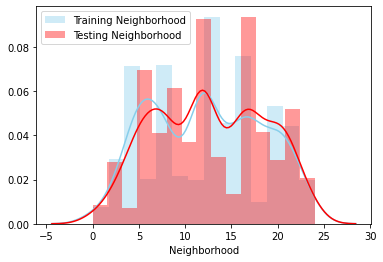

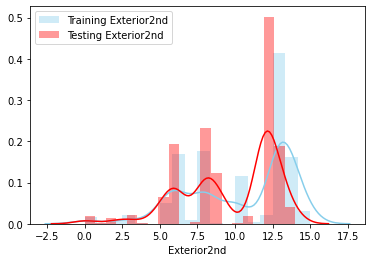

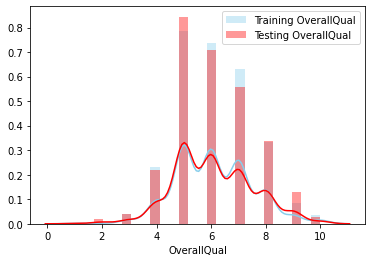

In [32]:

# Method 1: To identify the availability of covariate shift

# Plot the Neighborhood
sns.distplot( training["Neighborhood"] , color="skyblue", label="Training Neighborhood")
sns.distplot( testing["Neighborhood"] , color="red", label="Testing Neighborhood")
plt.legend()
plt.show()

# Plot the Exterior2nd
sns.distplot( training["Exterior2nd"] , color="skyblue", label="Training Exterior2nd")
sns.distplot( testing["Exterior2nd"] , color="red", label="Testing Exterior2nd")
plt.legend()
plt.show()

#Plot the OverallQuality of the houses
sns.distplot( training["OverallQual"] , color="skyblue", label="Training OverallQual")
sns.distplot( testing["OverallQual"] , color="red", label="Testing OverallQual")
plt.legend()
plt.show()

In [0]:
#We will Train our model with drift to check accuracy 

## Acquired sample from training and test data
train_drift = train.sample(1459, random_state=12)
test_drift = test.sample(1400, random_state=11)

# label are the values we want to predict
label = np.array(train_drift['SalePrice'])

# Remove the label from the features
train_drift= train_drift.drop('SalePrice', axis = 1)

# Saving feature names for later use
train_drift_list = list(train_drift.columns)

# Convert to numpy array
train_drift = np.array(train_drift)

In [0]:
# Split the dataset in 70%, 30% ratio
train_x, test_x, train_y, test_y = train_test_split(train_drift, label, test_size = 0.30, random_state = 42)

# Instantiate model with 200 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)

# Fit the model on training data
rf.fit(train_x, train_y);

In [58]:
# Use the random forest and predict method on the test data
predictions = rf.predict(test_x)

# Calculate the absolute errors
errors = abs(predictions - test_y)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.24 %.


In [0]:
##Now we will remove the drift by dropping certain features from training and test dataset
## dropping drifting features which are not important.
drift_train = training.drop(['Id','RoofMatl','Exterior1st','Exterior2nd','Heating','Electrical','GarageQual','PoolQC'], axis=1)
drift_test = testing.drop(['Id','RoofMatl','Exterior1st','Exterior2nd','Heating','Electrical','GarageQual','PoolQC'], axis=1)

In [0]:
# Split the data into training and testing sets
drift_train_x, drift_test_x, drift_train_y, drift_test_y = train_test_split(drift_train, label, test_size = 0.25, random_state = 42)
# Instantiate model with 200 decision trees
drift_rf = RandomForestRegressor(n_estimators = 100, random_state = 20)
# Train the model on training data
drift_rf.fit(drift_train_x, drift_train_y);

In [61]:
# Use the forest's predict method on the test data
drift_rf_predictions = drift_rf.predict(drift_test_x)
# Calculate the absolute errors
drift_rf_errors = abs(drift_rf_predictions - drift_test_y)
# Calculate mean absolute percentage error (MAPE)
drift_rf_mape = 100 * (drift_rf_errors / drift_test_y)
# Calculate and display accuracy
drift_rf_accuracy = 100 - np.mean(drift_rf_mape)
print('Without Drift Accuracy:', round(drift_rf_accuracy, 2), '%.')

Without Drift Accuracy: 89.64 %.
